In [2]:
import os
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from abc import ABC, abstractmethod


from mpl_toolkits import mplot3d
from collections import defaultdict
plt.rcParams.update({'font.size': 15})

In [3]:
class Trajectory(ABC):
    def __init__(self, experiment, init_state, goal_states, fix_lim=False, filter_traj=None):
        
        self.current_goal_state = None
        self.experiment = experiment
        self.fix_lim = fix_lim
        self.filter = filter_traj
        
        self.initial_state = init_state
        self.goal_states = goal_states
        
        self.hist_gstate = defaultdict(int)
        
        # raw data
        self.data = self.load_data()
        # data organized by goal states
        self.data_list = self.dict2list()
        # all trajectories together
        self.data_reshaped = self.list_reshape()
        
        
    def load_data(self):
        data = defaultdict(list)
        for file in os.listdir(f"../results/{self.experiment}/"):
            if 'coord' in file:
                
                goal_state = int(file.split('_')[1][0])
                trajectory = int(file.split('.')[1])
                
                if self.filter is not None and trajectory < self.filter:
                    continue
                self.hist_gstate[goal_state] += 1
                
                
                with open(f"../results/{self.experiment}/{file}") as csv_file:
                    trajectory = []
                    csv_reader = csv.reader(csv_file, delimiter=',')
                    line_count = 0
                    for i, row in enumerate(csv_reader):
                        trajectory.append(row)
                data[goal_state].append(trajectory)
        return data
    
    def dict2list(self):
        return [d for d in self.data.values()]
    
    def list_reshape(self):
        return [j for d in self.data_list for j in d]

    def plot_list(self, traj_list, ax):
        for traj in traj_list:
            self.plot_trajectory(traj, ax)
        
    def plot_standard(self, ax):
        self.plot_goal_states(ax)
        self.plot_init_state(ax)
        self.plot_labels(ax)
        self.plot_lim(ax)
        
        
    @abstractmethod
    def plot_lim(self):
        
        raise NotImplementedError()
        
    @abstractmethod
    def plot_trajectory(self):
        
        raise NotImplementedError()
        
    @abstractmethod
    def plot_goal_states(self):
        
        raise NotImplementedError()
    
    @abstractmethod
    def plot_init_state(self):
        
        raise NotImplementedError()
    
    @abstractmethod
    def plot_point(self):
        
        raise NotImplementedError()
    
    @abstractmethod
    def plot_labels(self, ax):

        raise NotImplemetedError()
        
    @abstractmethod
    def plot_per_goal_state(self):
        
        raise NotImplementedError()
            
    @abstractmethod
    def plot_all_together(self):
        
        raise NotImplementedError()
        
    @abstractmethod
    def plot_pointcloud(self):
        
        raise NotImplementedError()
        

In [4]:
class Trajectory3D(Trajectory):
    def __init__(self, experiment, init_state, goal_states, filter_traj=None):
        super().__init__(experiment, init_state, goal_states, filter_traj=filter_traj)
        
        self.current_goal_state = None
        
    
    def plot_trajectory(self, traj, ax):
        d = np.array(traj, dtype=np.float32)
        ax.plot3D(d[:,0], d[:,1], d[:,2])
        

    def plot_goal_states(self, ax):
        for i,(x,y,z) in enumerate(self.goal_states):
            if self.current_goal_state == i:
                ax.plot(x, y, z, marker='o', color='blue', markersize=13)
            else:
                ax.plot(x, y, z, marker='o', color='black', markersize=10)
            text = '   ' + str(x) + ', ' + str(y) + ', ' + str(z)
            ax.text(x, y, z, text)    
    

    def plot_init_state(self, ax):
        x,y,z = self.initial_state
        ax.plot(x,y,z, marker='o', markersize=10)
        text = '   ' + str(x) + ', ' + str(y) + ', ' + str(z)
        ax.text(x, y, z, text)
    

    def plot_point(self, point, ax):
        x,y,z = point
        ax.plot(x, y, z, color='blue', marker='.', markersize=1)
            

    def plot_labels(self, ax):
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        
    def plot_lim(self, ax):
        pass
        
        
    def plot_per_goal_state(self):
        fig = plt.figure(figsize=(20,20))
        for i, goal_state in enumerate(self.data_list):
            self.current_goal_state = i
            ax = fig.add_subplot(2, 2, i+1, projection='3d')
            for traj in goal_state:
                self.plot_trajectory(traj, ax)
            
            self.plot_standard(ax)
        self.current_goal_state = None

            
    def plot_all_together(self):
        fig, ax = plt.subplots(figsize=(15,15))
        ax = plt.axes(projection='3d')
        for traj in self.data_reshaped:
            self.plot_trajectory(traj, ax)
            
        self.plot_standard(ax)
        
    def plot_pointcloud(self):
        fig, ax = plt.subplots(figsize=(15,15))
        ax = plt.axes(projection='3d')
        for traj in self.data_reshaped:
            traj = np.array(traj, dtype=np.float32)
            for point in traj:
                self.plot_point(point, ax)

        self.plot_standard(ax)
        
        

In [5]:
class Trajectory2D(Trajectory):
    def __init__(self, experiment, init_state, goal_states, fix_lim=False, filter_traj=None):
        super().__init__(experiment, init_state, goal_states, fix_lim=fix_lim, filter_traj=filter_traj)
        
        self.current_goal_state = None
        
    def plot_trajectory(self, traj, ax):
        d = np.array(traj, dtype=np.float32)
        ax.plot(d[:,0], d[:,2])
        
    def plot_goal_states(self, ax):
        
        for i,(x,y) in enumerate(self.goal_states):
            if self.current_goal_state == i:
                ax.plot(x, y, marker='o', color='blue', markersize=13)
            else:
                ax.plot(x, y, marker='o', color='black', markersize=10)
            text = '   ' + str(x) + ', ' + str(y) 
            ax.text(x, y, text)
    
    def plot_init_state(self, ax):
        
        x,y = self.initial_state
        ax.plot(x,y, marker='o', markersize=10)
        text = '   ' + str(x) + ', ' + str(y)
        ax.text(x, y, text)
    
    def plot_point(self, point, ax):
        
        x,z = point
        ax.plot(x, z, color='blue', marker='.', markersize=1)
    
    def plot_labels(self, ax):

        ax.set_xlabel('x')
        ax.set_ylabel('z')
        
    def plot_lim(self, ax):
        if self.fix_lim:
            ax.set_xlim(-55, 55)
            ax.set_ylim(-55, 55)
        
    def plot_per_goal_state(self):
        
        fig = plt.figure(figsize=(20,20))
        for i, goal_state in enumerate(self.data_list):
            self.current_goal_state = i
            ax = fig.add_subplot(3, 3, i+1)
            for traj in goal_state:
                self.plot_trajectory(traj, ax)
            
            self.plot_standard(ax)
        self.current_goal_state = None
            
    def plot_all_together(self):
        
        fig, ax = plt.subplots(figsize=(15,15))
        for traj in self.data_reshaped:
            self.plot_trajectory(traj, ax)            
        self.plot_standard(ax)
        
    def plot_pointcloud(self):
        
        fig, ax = plt.subplots(figsize=(15,15))
        for traj in self.data_reshaped:
            traj = np.array(traj, dtype=np.float32)
            for point in traj:
                self.plot_point(point, ax)
        self.plot_standard(ax)
        

## Example plot / goal_state

In [6]:
goal_states = [
    [28.94, 79.0, -21.95],
    [49.76, 96.85, 36.43],
    [-45.50, 108, 1.45],
]
initial_state = np.array([-0.5, 96. ,  1.5], dtype=np.float32)

In [7]:
experiment = 'example_goal_state'

t = Trajectory3D(experiment, initial_state, goal_states)

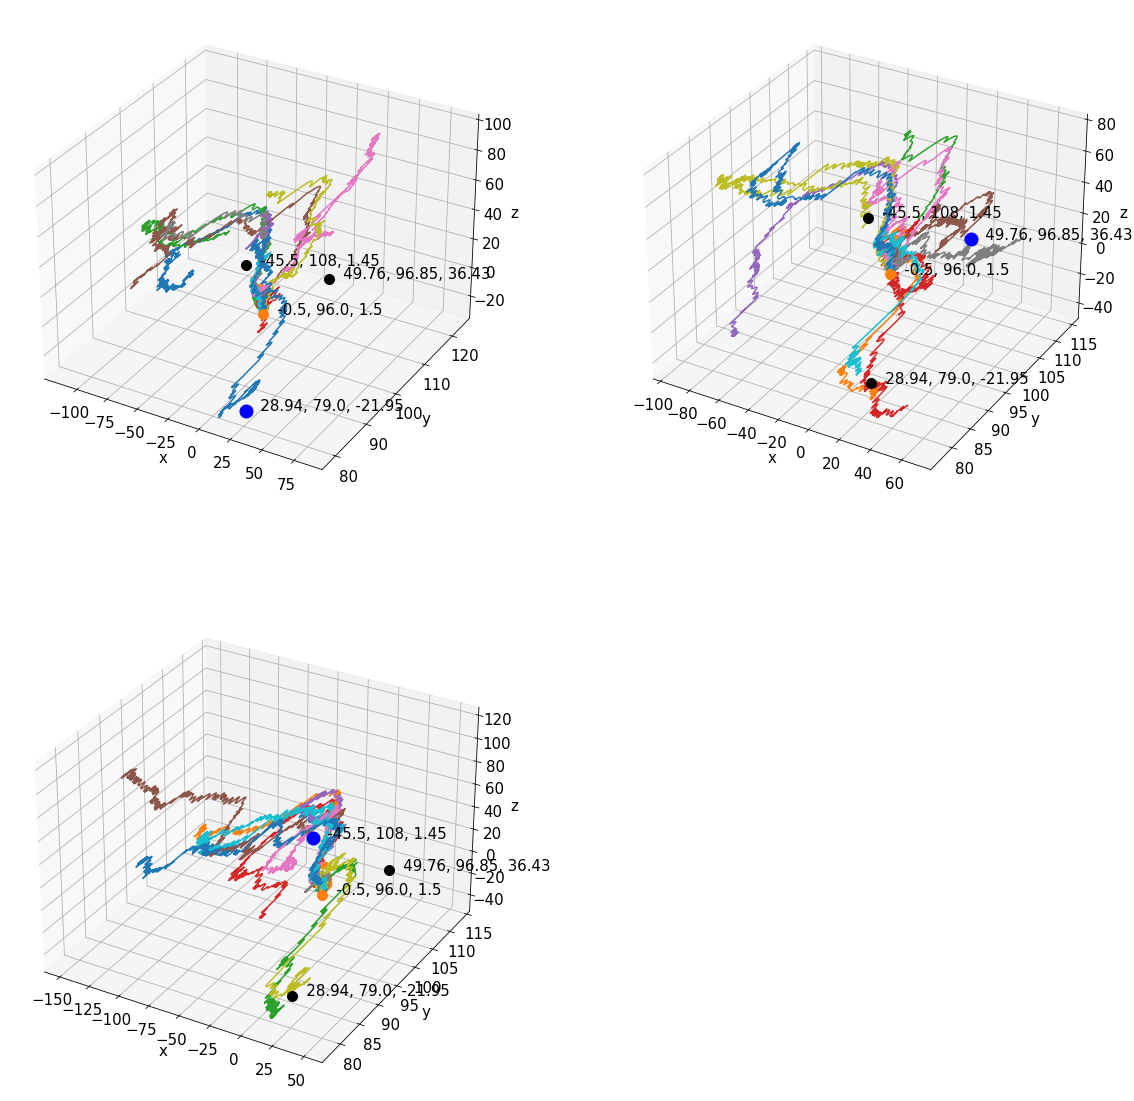

In [8]:
t.plot_per_goal_state()

## Example plot all together

In [9]:
experiment = 'example_all_together'

t1 = Trajectory3D(experiment, initial_state, goal_states)

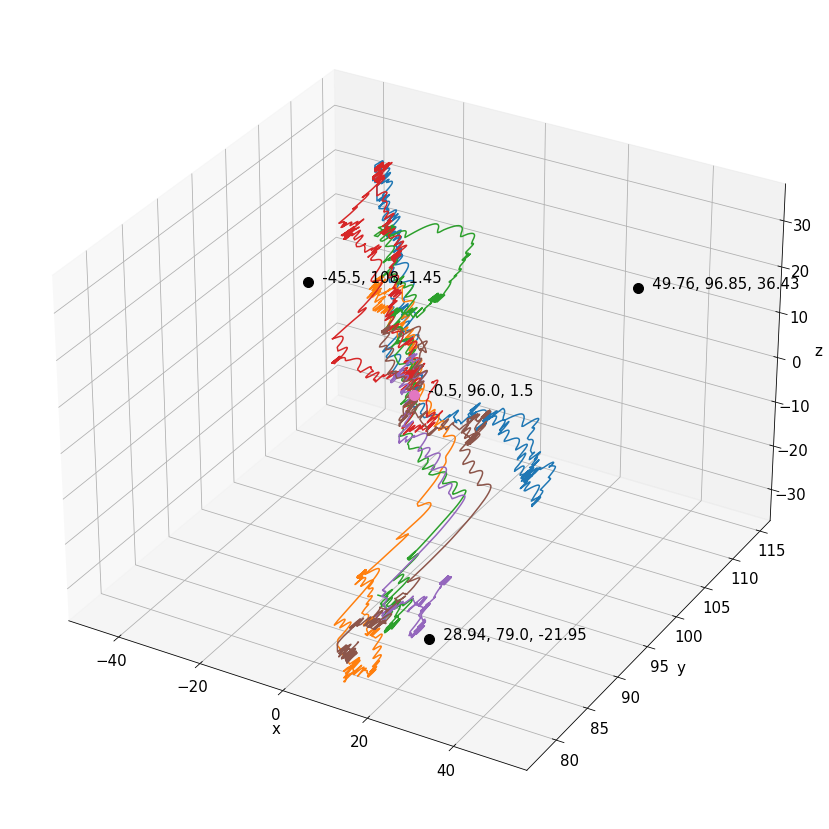

In [10]:
t1.plot_all_together()

## Example point cloud

In [11]:
experiment = 'example_all_together'

t2 = Trajectory3D(experiment, initial_state, goal_states)

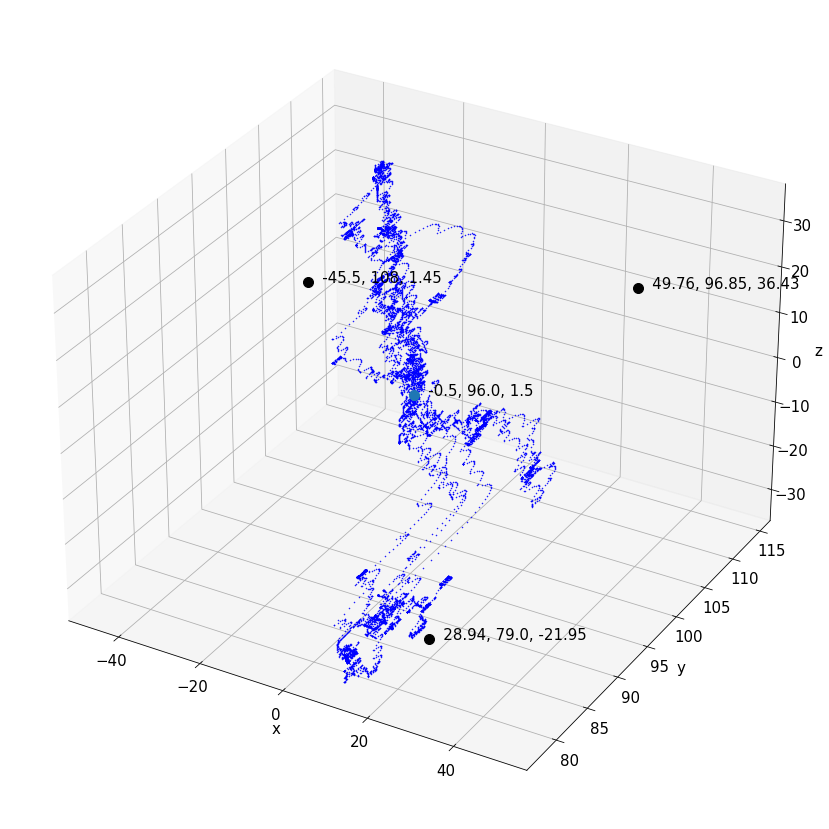

In [12]:
t2.plot_pointcloud()

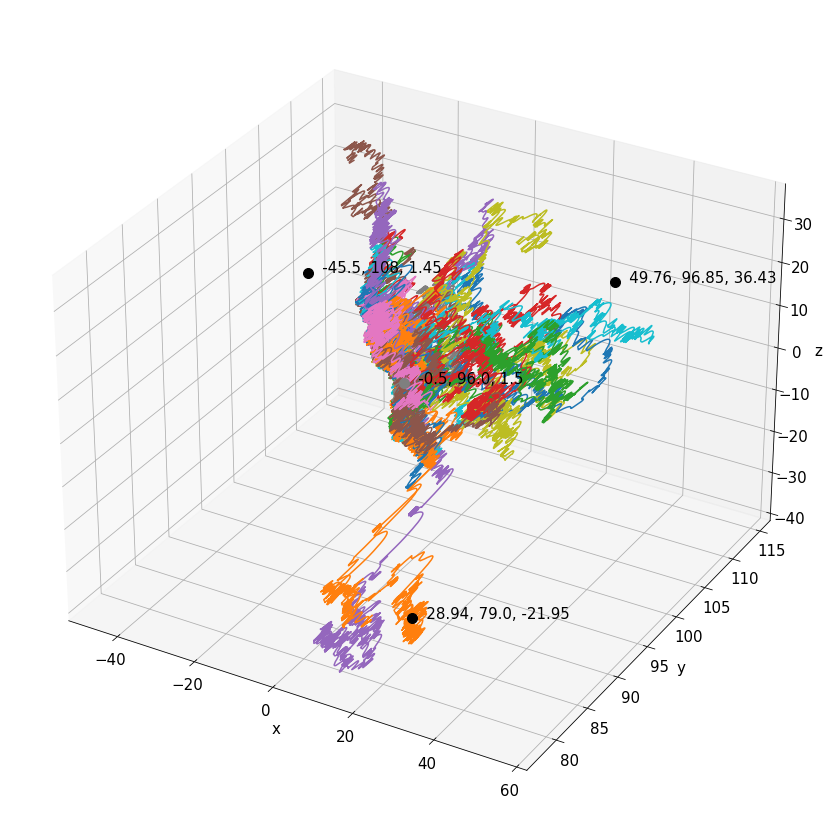

In [13]:
experiment = 'kmeans_50'
t3 = Trajectory3D(experiment, initial_state, goal_states)
t3.plot_all_together()

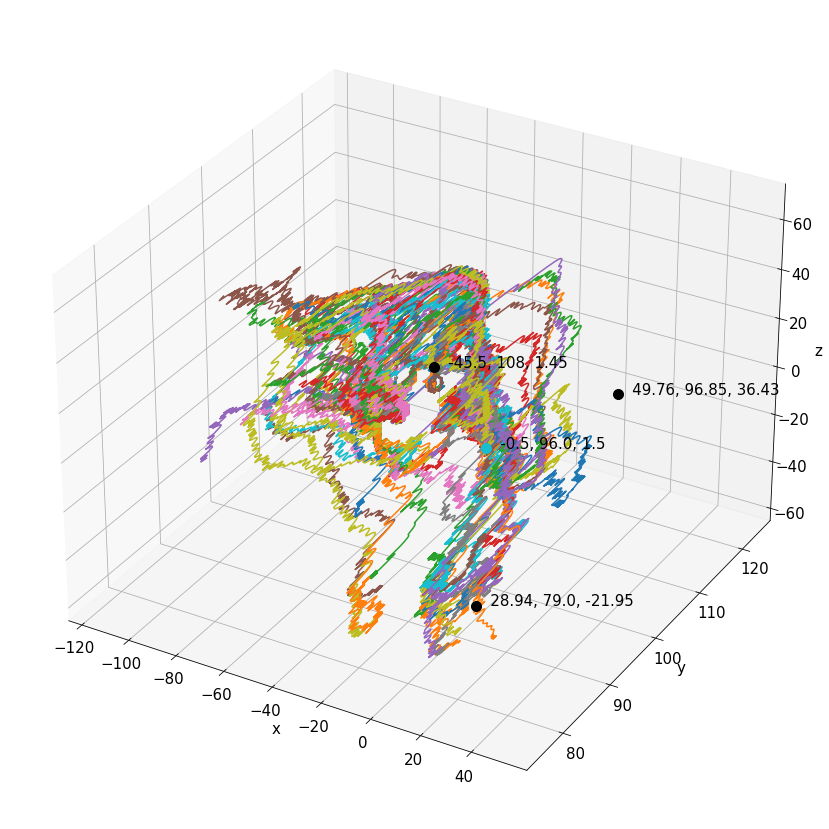

In [14]:
experiment = 'kmeans_30'
t4 = Trajectory3D(experiment, initial_state, goal_states)
t4.plot_all_together()

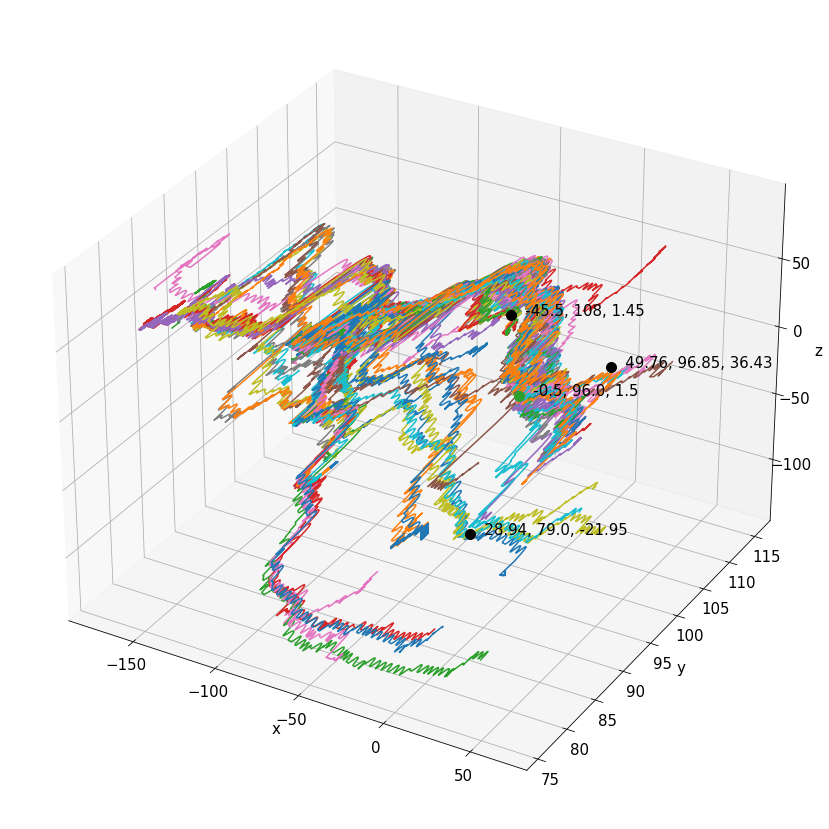

In [15]:
experiment = 'kmeans_10'
t5 = Trajectory3D(experiment, initial_state, goal_states)
t5.plot_all_together()

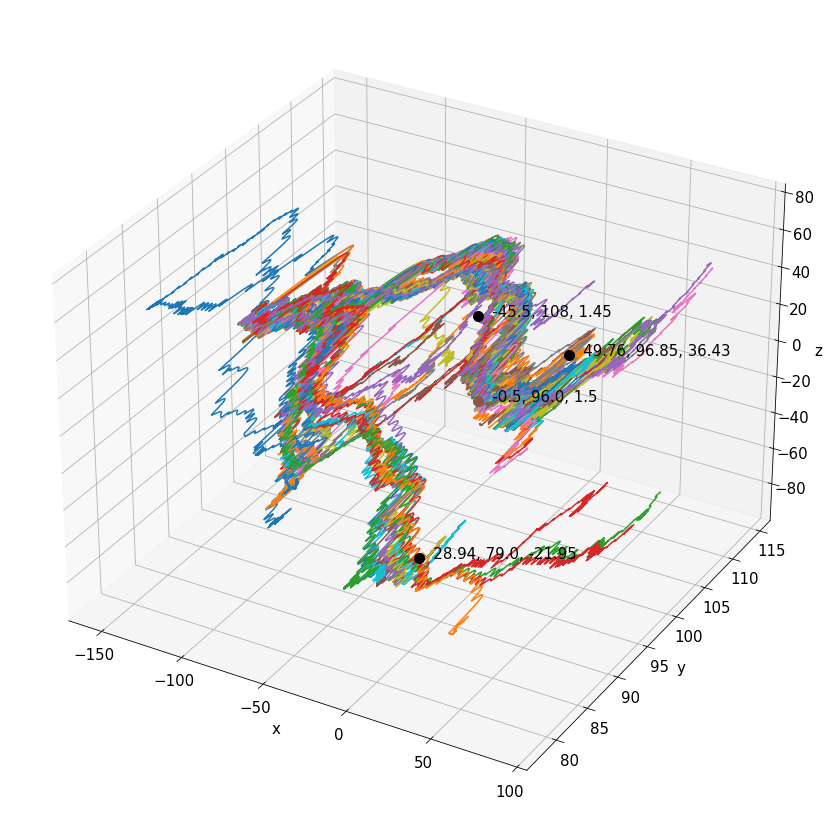

In [16]:
experiment = 'kmeans_4'
t6 = Trajectory3D(experiment, initial_state, goal_states)
t6.plot_all_together()

## Evaluating training conditioned on the 3 goal states

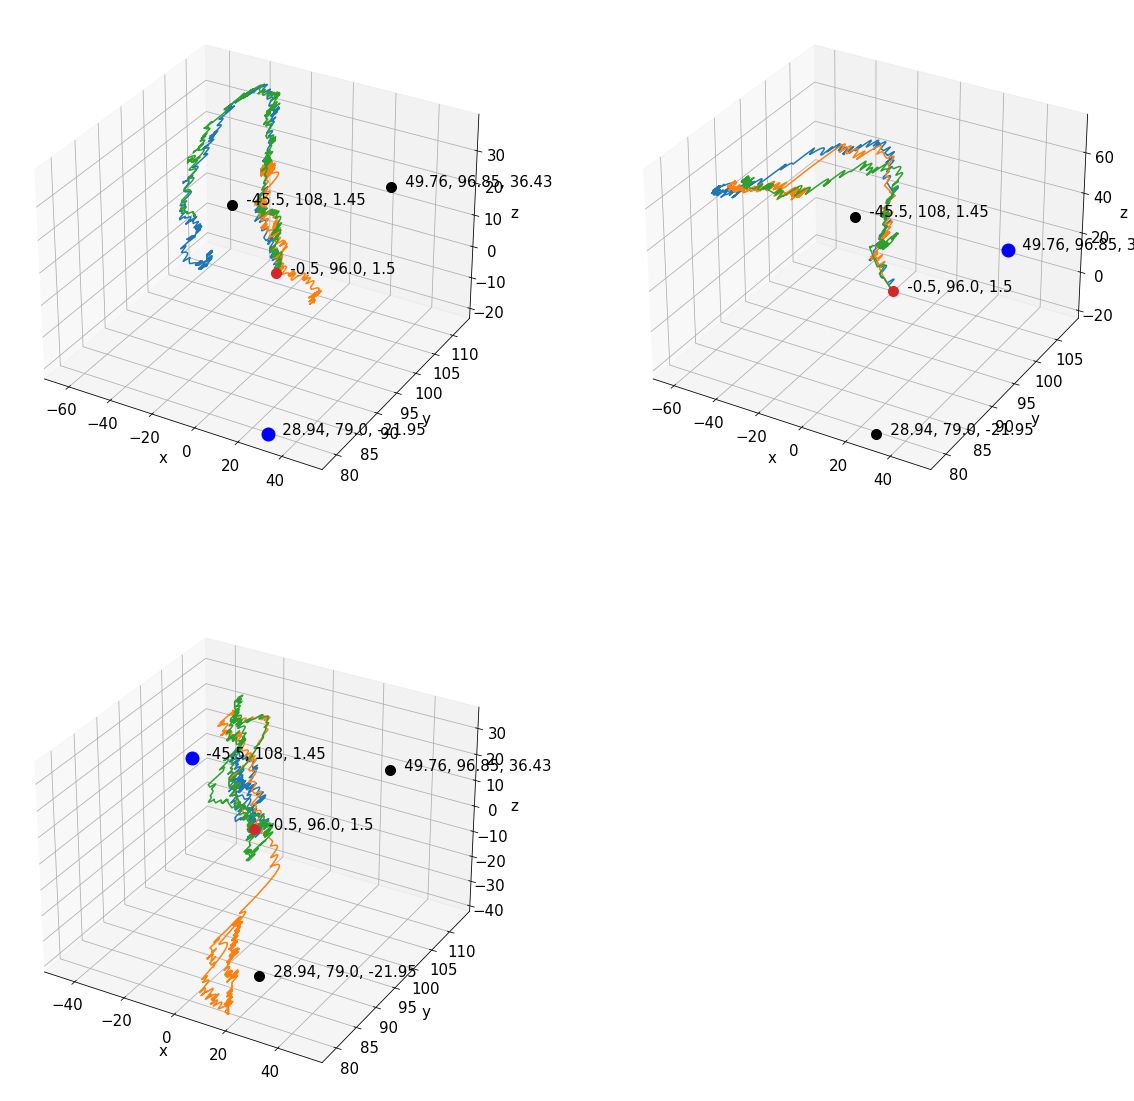

In [17]:
experiment = '95beb1e0807db3d2c4245102d25ec67f23477167-e6d7327f-9c76e63e'
t7 = Trajectory3D(experiment, initial_state, goal_states)
t7.plot_per_goal_state()

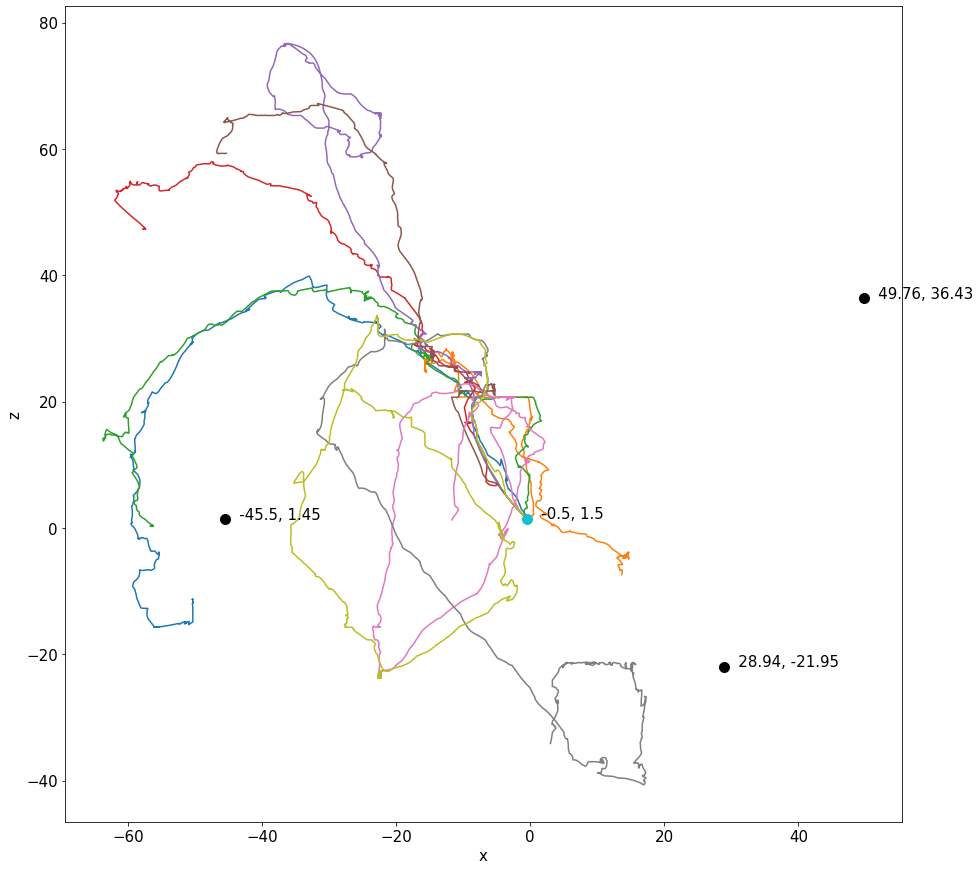

In [19]:
goal_states = [
    [28.94, -21.95],
    [49.76, 36.43],
    [-45.50, 1.45],
]
initial_state = np.array([-0.5,  1.5], dtype=np.float32)
experiment = '95beb1e0807db3d2c4245102d25ec67f23477167-e6d7327f-9c76e63e'
t8 = Trajectory2D(experiment, initial_state, goal_states)
t8.plot_all_together()

In [20]:
# order matters!
goal_states = [
    [0,20],
    [20,20],
    [20,0],
    [20,-20],
    [0,-20],
    [-20,-20],
    [-20,0],
    [-20,20],
]
initial_state = [0,0]

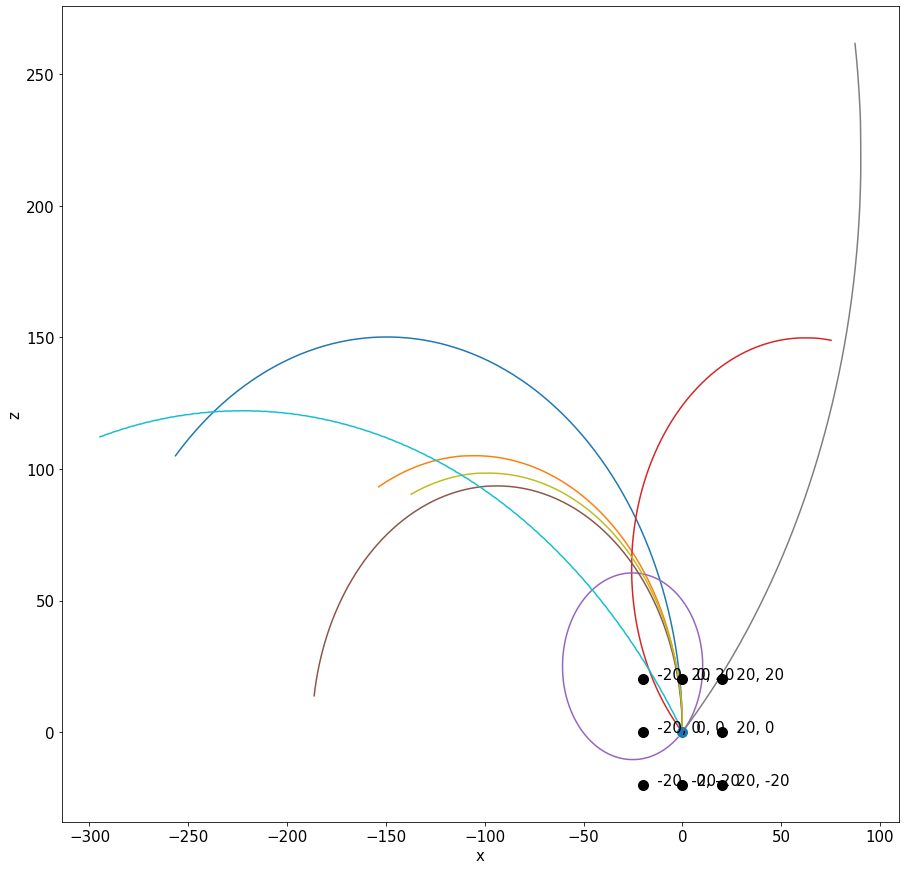

In [21]:
experiment = 'kmeans_10_single'
t9 = Trajectory2D(experiment, initial_state, goal_states)
t9.plot_all_together()

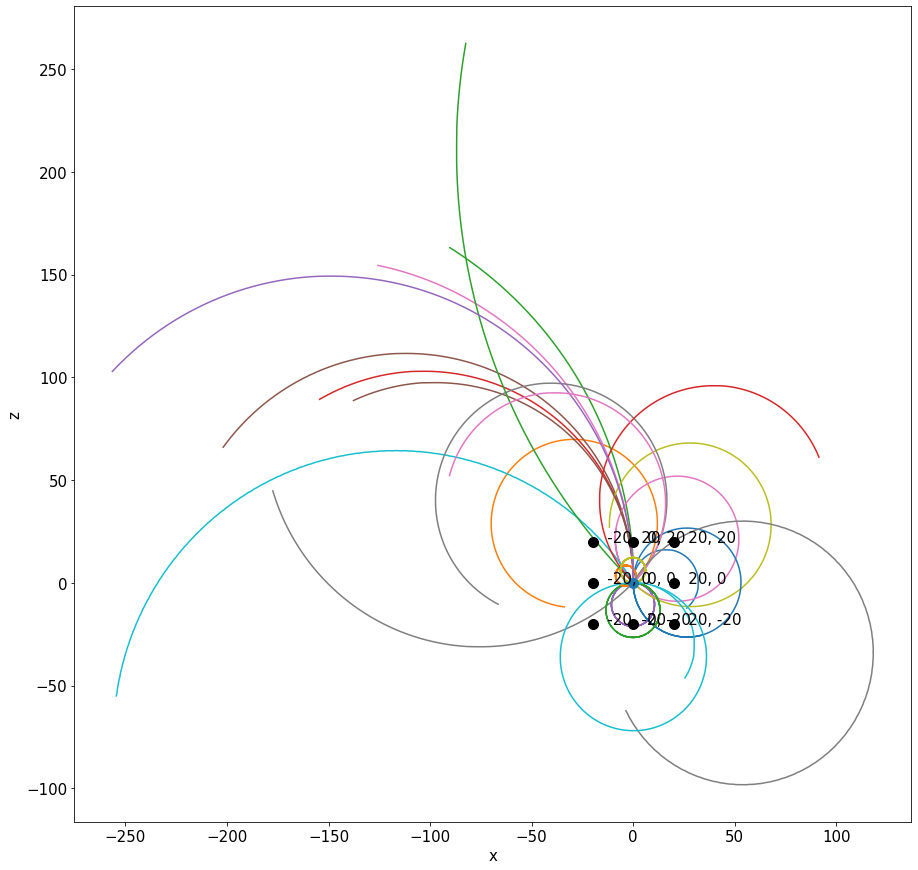

In [22]:
experiment = 'kmeans_30_single'
t10 = Trajectory2D(experiment, initial_state, goal_states)
t10.plot_all_together()

In [23]:
experiment = 'unidirectional_trajectories'
t11 = Trajectory2D(experiment, initial_state, goal_states, fix_lim=True)

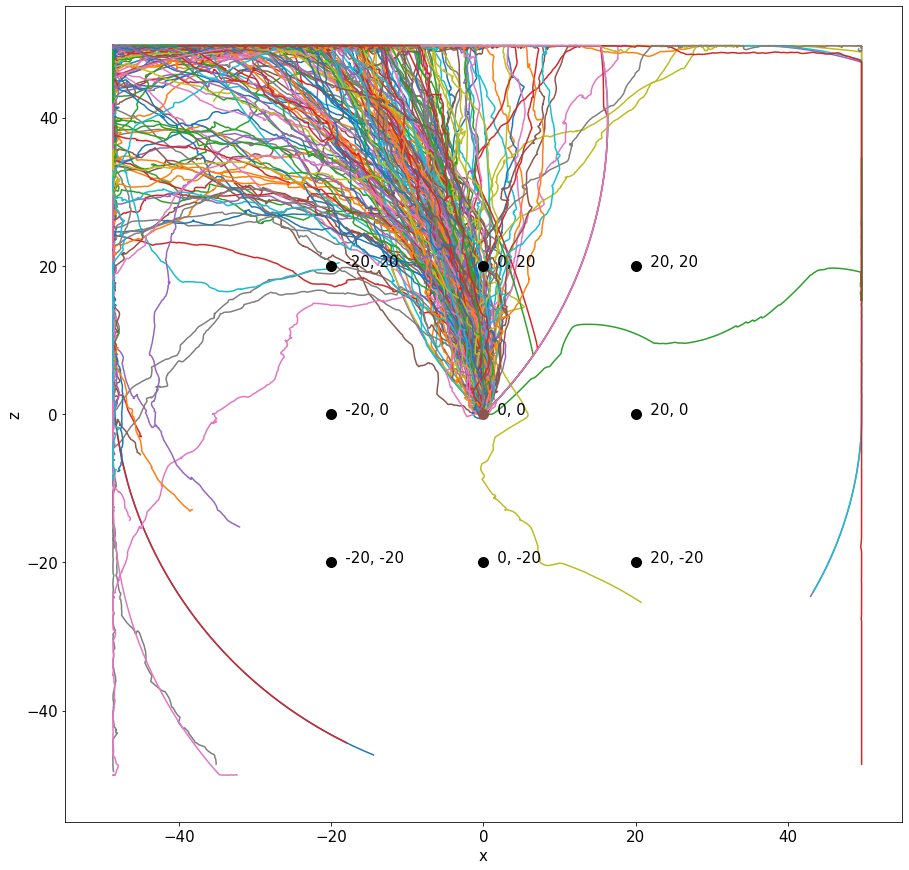

In [24]:
t11.plot_all_together()

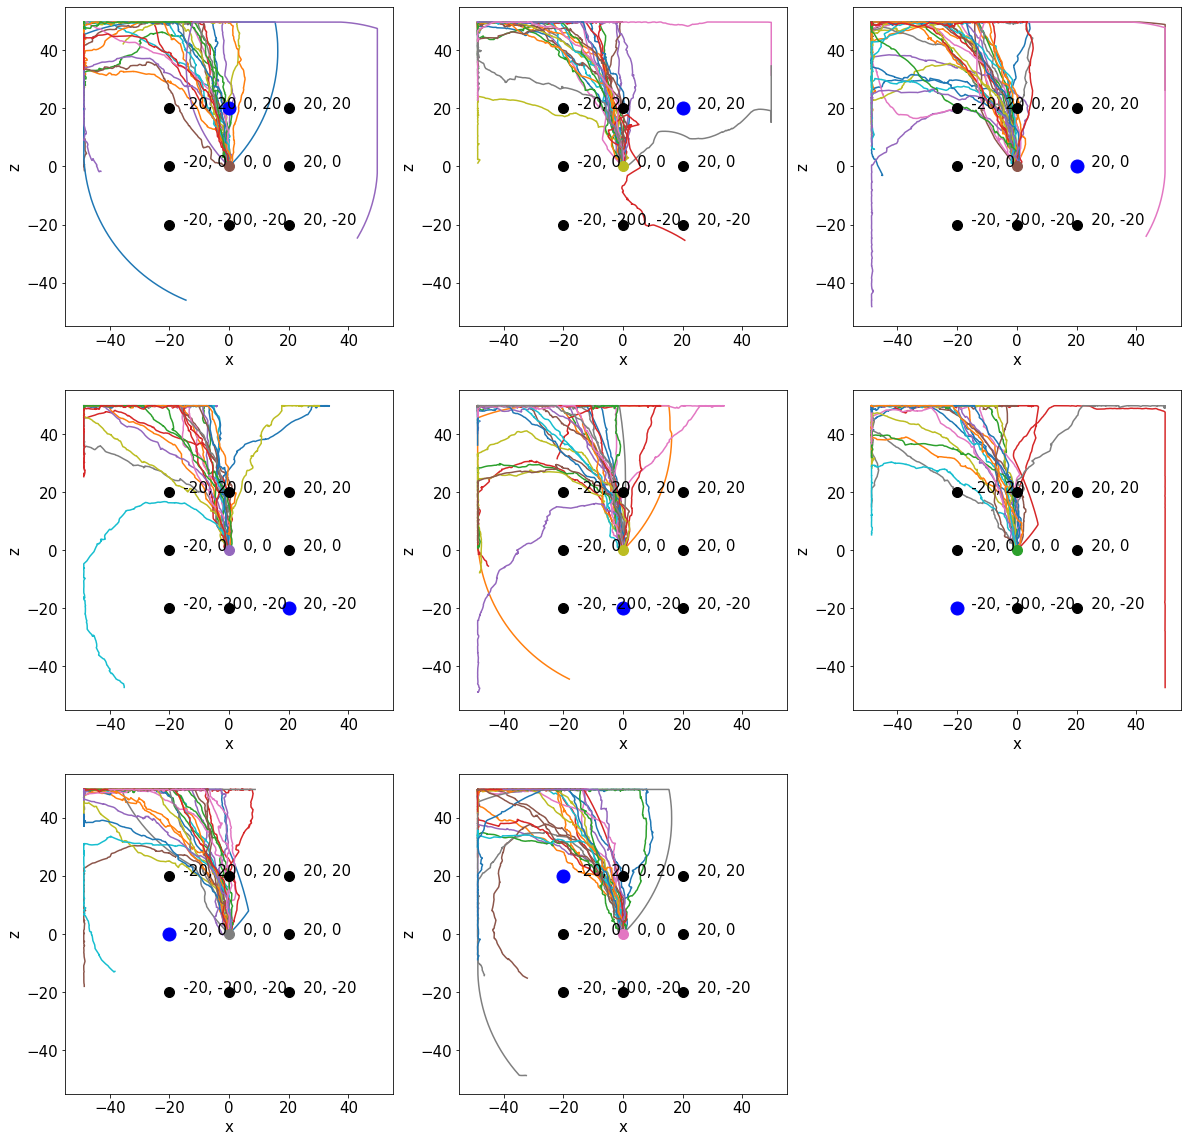

In [25]:
t11.plot_per_goal_state()

In [26]:
experiment = 'isotropic_trajectories'
t12 = Trajectory2D(experiment, initial_state, goal_states, fix_lim=True)

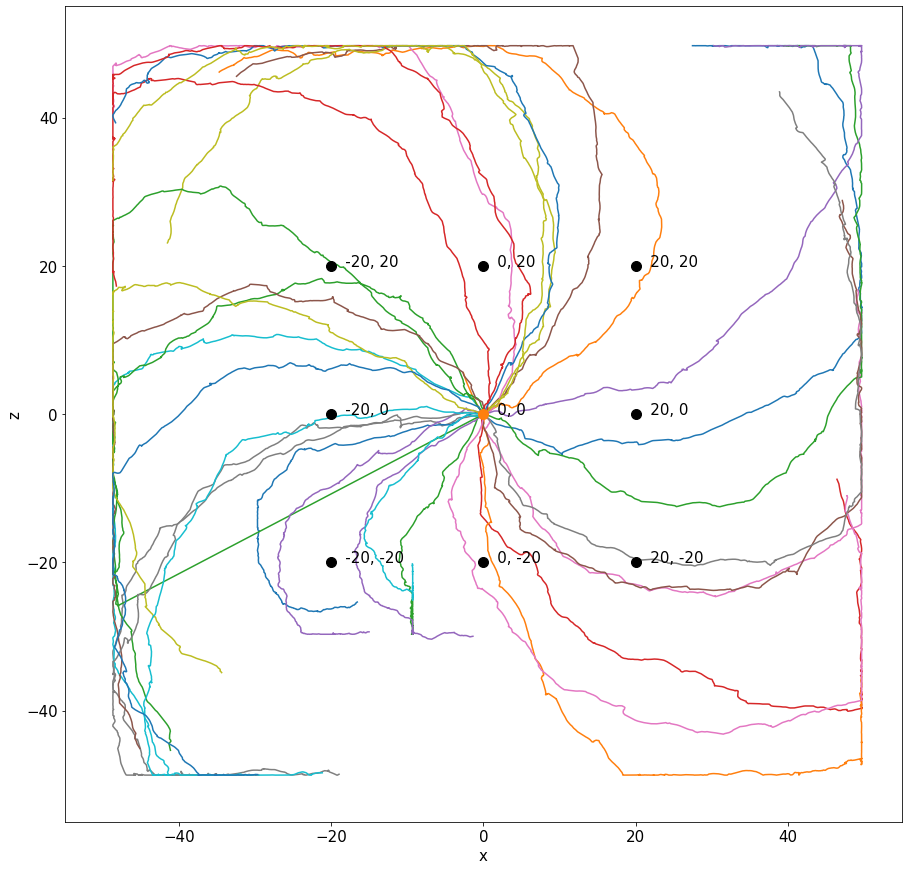

In [27]:
t12.plot_all_together()

In [28]:
experiment = '785667a37ba7c6b628e41d0f578c5b932259976a-00000000-a621848d'
t13 = Trajectory2D(experiment, initial_state, goal_states, fix_lim=True)

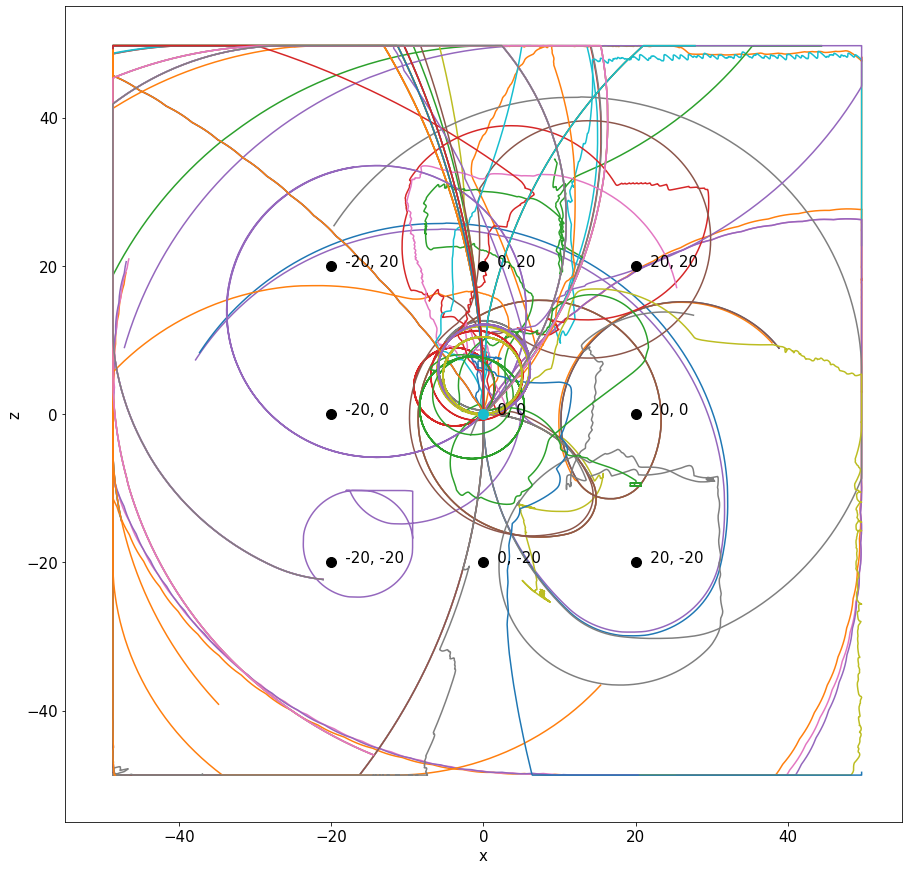

In [29]:
t13.plot_all_together()

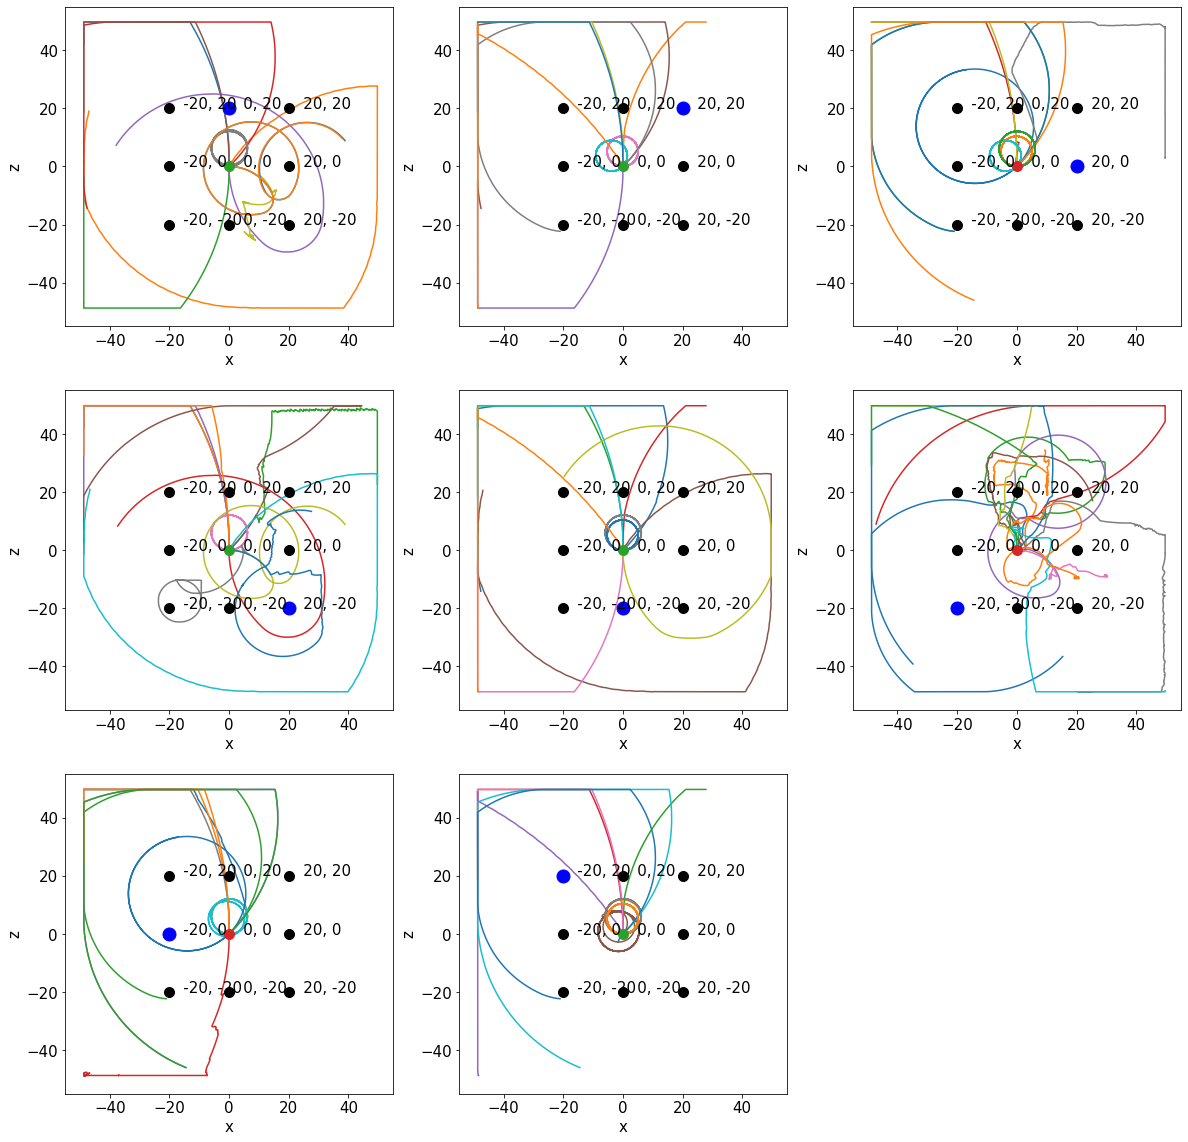

In [30]:
t13.plot_per_goal_state()

In [31]:
data = defaultdict(list)
for file in sorted([x for x in os.listdir(f"../results/{experiment}/") if 'reward' in x],key=lambda x: int(x.split('.')[1])):
    if 'reward' in file:

        goal_state = int(file.split('_')[1][0])

        with open(f"../results/{experiment}/{file}") as csv_file:
            trajectory = []
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0
            for i, row in enumerate(csv_reader):
                trajectory.append(row)
            
        data[goal_state].append(trajectory)
        a = np.array(trajectory, dtype=np.float32)
        if np.sum(a) > 100:
            print(file)

rewards_0.360.csv
rewards_1.393.csv
rewards_0.560.csv
rewards_0.624.csv


In [45]:
goal_states = [[0,20]]
experiment = '9921fc1f3b8287262a1b4ca387fa5883c0423ee9-00000000-8a54db80'
t14 = Trajectory2D(experiment, initial_state, goal_states, fix_lim=True, filter_traj=300)

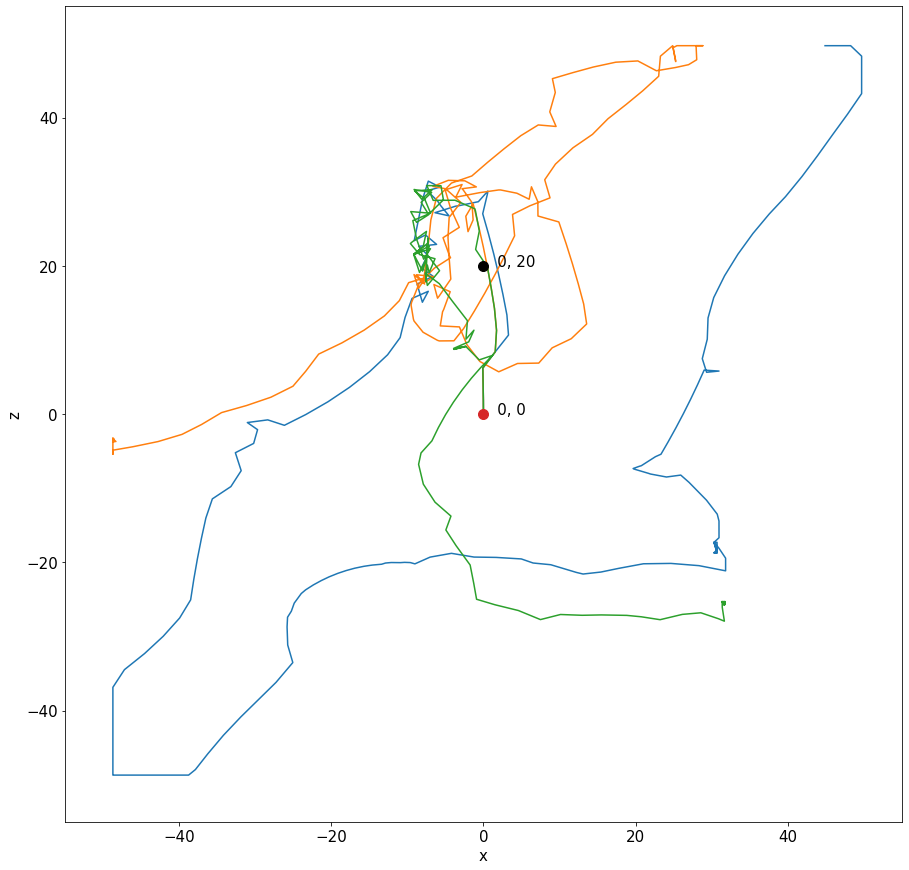

In [46]:
t14.plot_all_together()

In [47]:
data = defaultdict(list)
for file in sorted([x for x in os.listdir(f"../results/{experiment}/") if 'reward' in x],key=lambda x: int(x.split('.')[1])):
    if 'reward' in file:

        goal_state = int(file.split('_')[1][0])

        with open(f"../results/{experiment}/{file}") as csv_file:
            trajectory = []
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0
            for i, row in enumerate(csv_reader):
                trajectory.append(row)
            

In [50]:
experiment = '9921fc1f3b8287262a1b4ca387fa5883c0423ee9-00000000-943a77aa'
t16 = Trajectory2D(experiment, initial_state, goal_states, fix_lim=True)

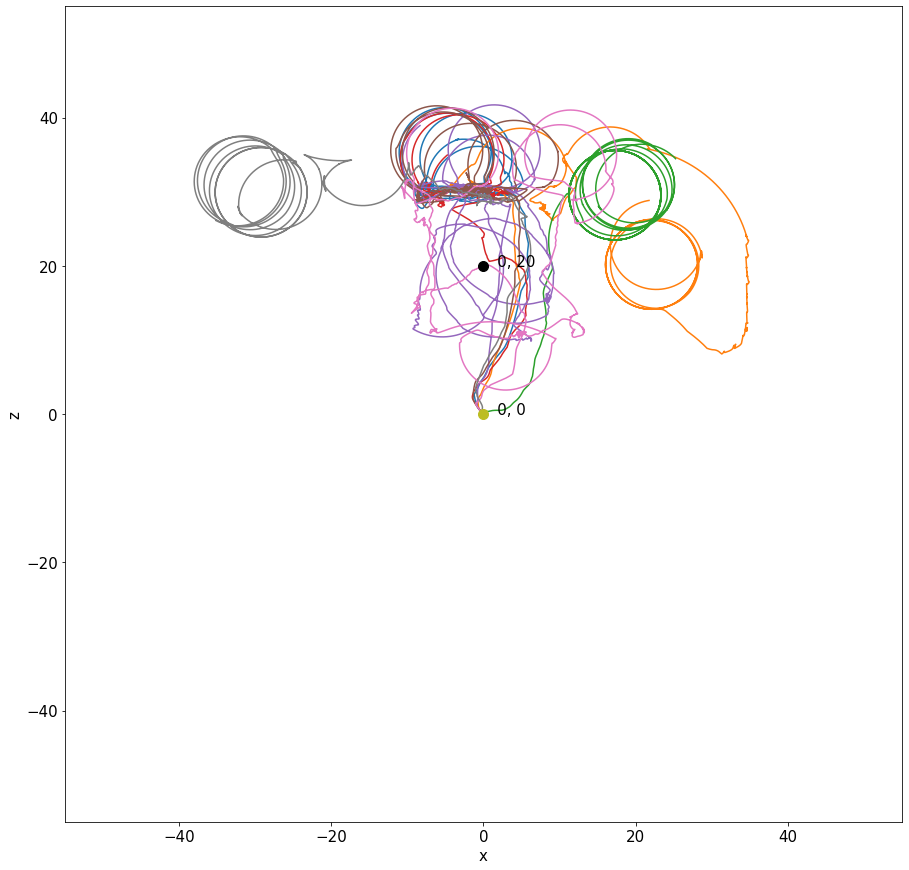

In [51]:
t16.plot_all_together()

In [52]:
goal_states = [
    [0,20],
    [20,20],
    [20,0],
    [20,-20],
    [0,-20],
    [-20,-20],
    [-20,0],
    [-20,20],
]
experiment = '9921fc1f3b8287262a1b4ca387fa5883c0423ee9-17de972e-943a77aa'
t17 = Trajectory2D(experiment, initial_state, goal_states, fix_lim=True)

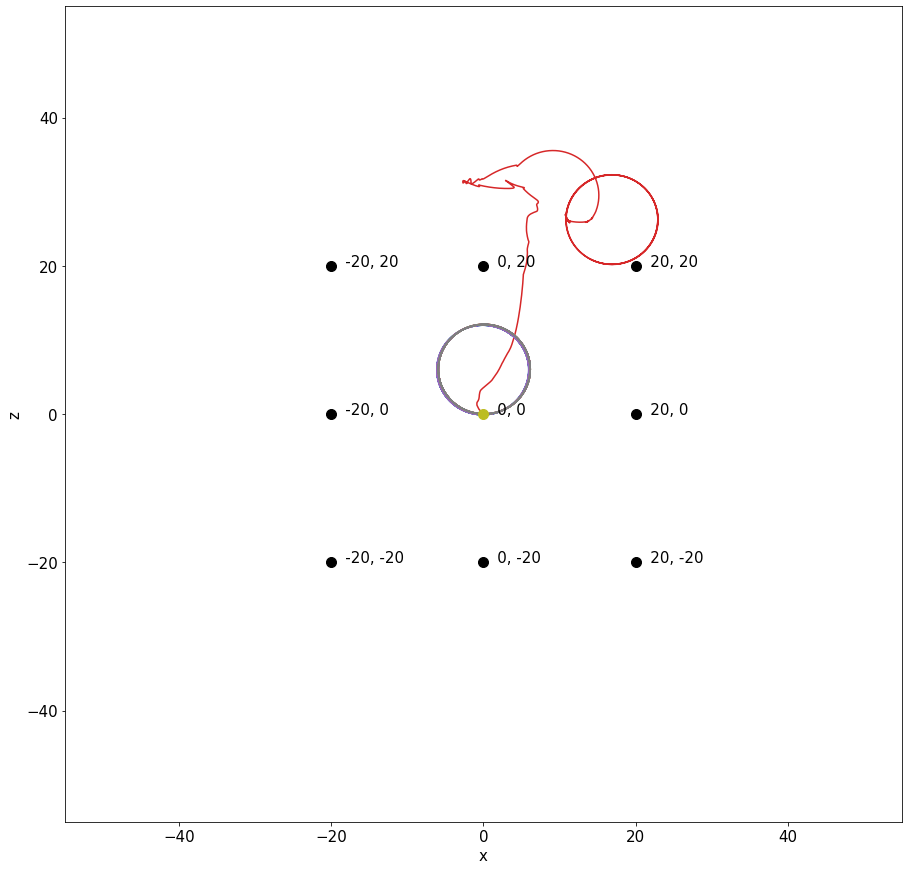

In [53]:
t17.plot_all_together()

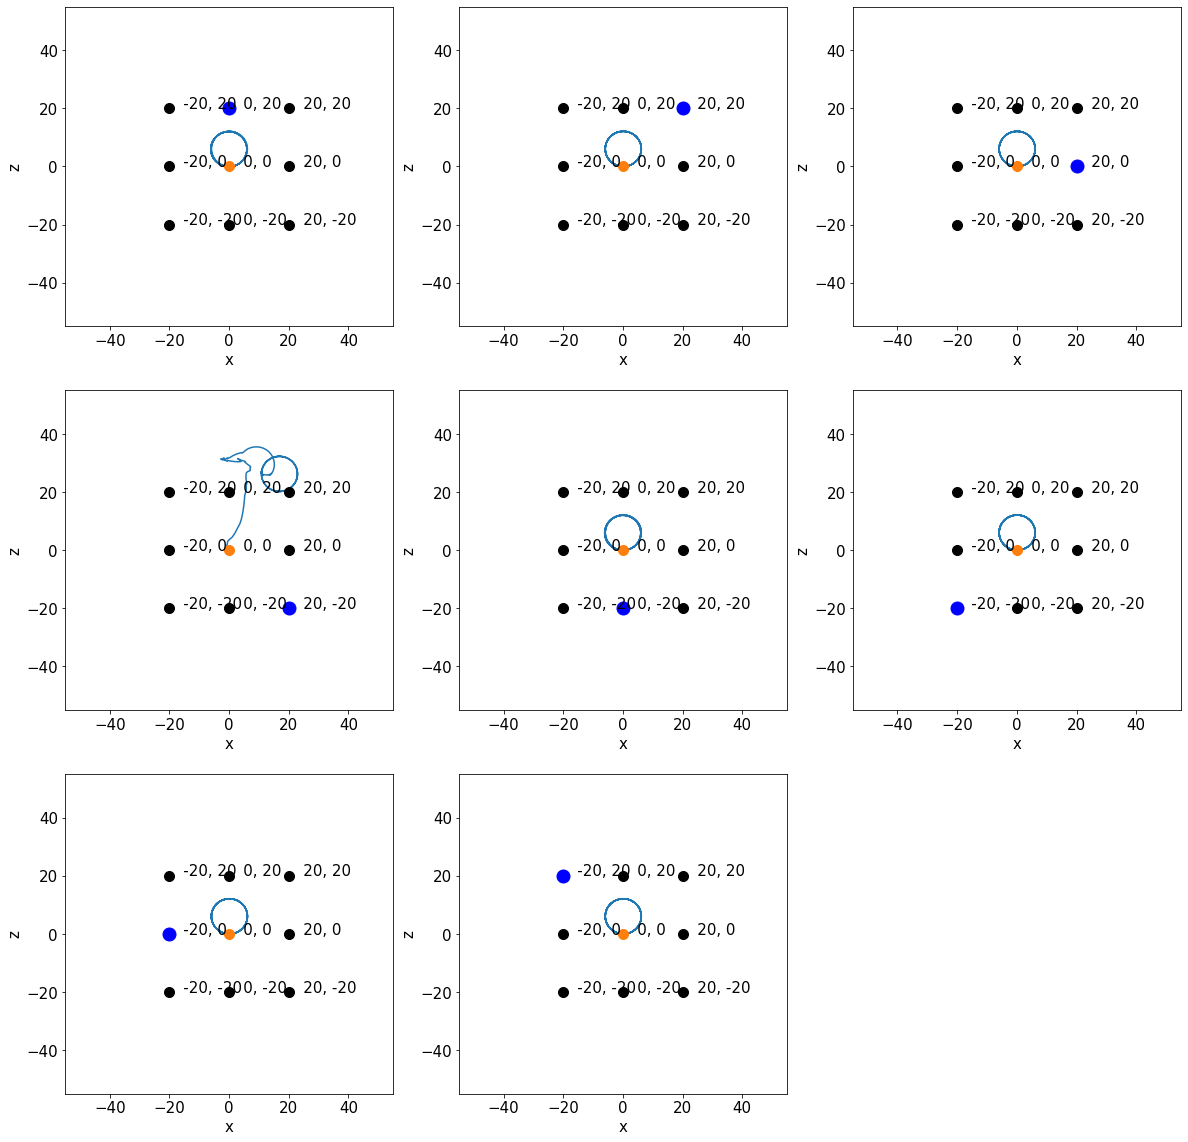

In [54]:
t17.plot_per_goal_state()

In [55]:
goal_states = [[-20,20]]
experiment = 'train_rl.0.0'
t18 = Trajectory2D(experiment, initial_state, goal_states, fix_lim=True, filter_traj=450)
t18.plot_all_together()

FileNotFoundError: [Errno 2] No such file or directory: '../results/train_rl.0.0/'

In [56]:
goal_states = [[-20,20]]
experiment = 'train_rl.0.1'
t19 = Trajectory2D(experiment, initial_state, goal_states, fix_lim=True)
t19.plot_all_together()

FileNotFoundError: [Errno 2] No such file or directory: '../results/train_rl.0.1/'

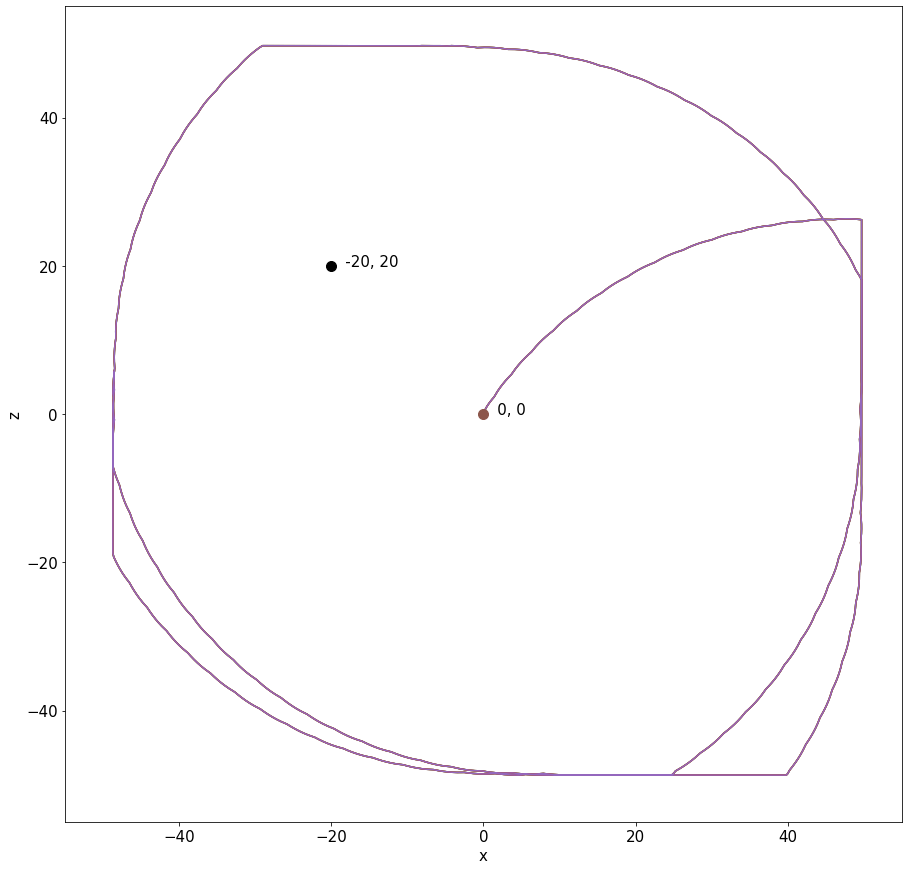

In [57]:
goal_states = [[-20,20]]
experiment = 'eval_rl.0.0'
t18 = Trajectory2D(experiment, initial_state, goal_states, fix_lim=True)
t18.plot_all_together()

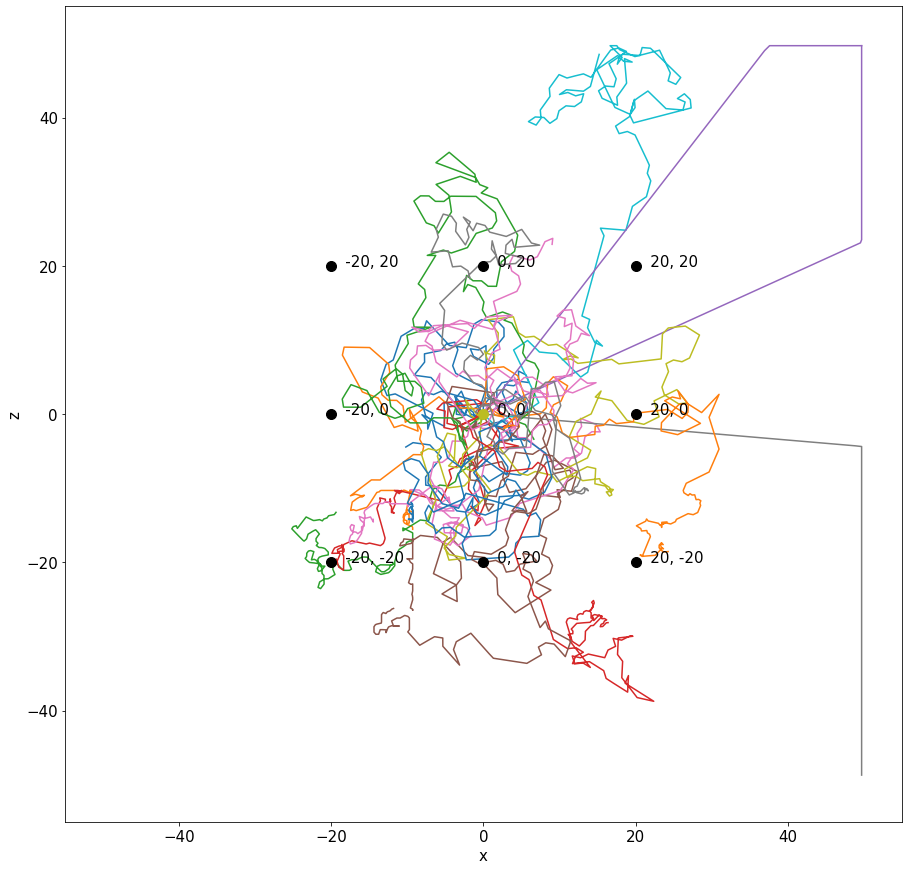

In [58]:
goal_states = [
    [0,20],
    [20,20],
    [20,0],
    [20,-20],
    [0,-20],
    [-20,-20],
    [-20,0],
    [-20,20],
]
experiment = 'train_non-obfuscated-test'
t19 = Trajectory2D(experiment, initial_state, goal_states, fix_lim=True)
t19.plot_all_together()

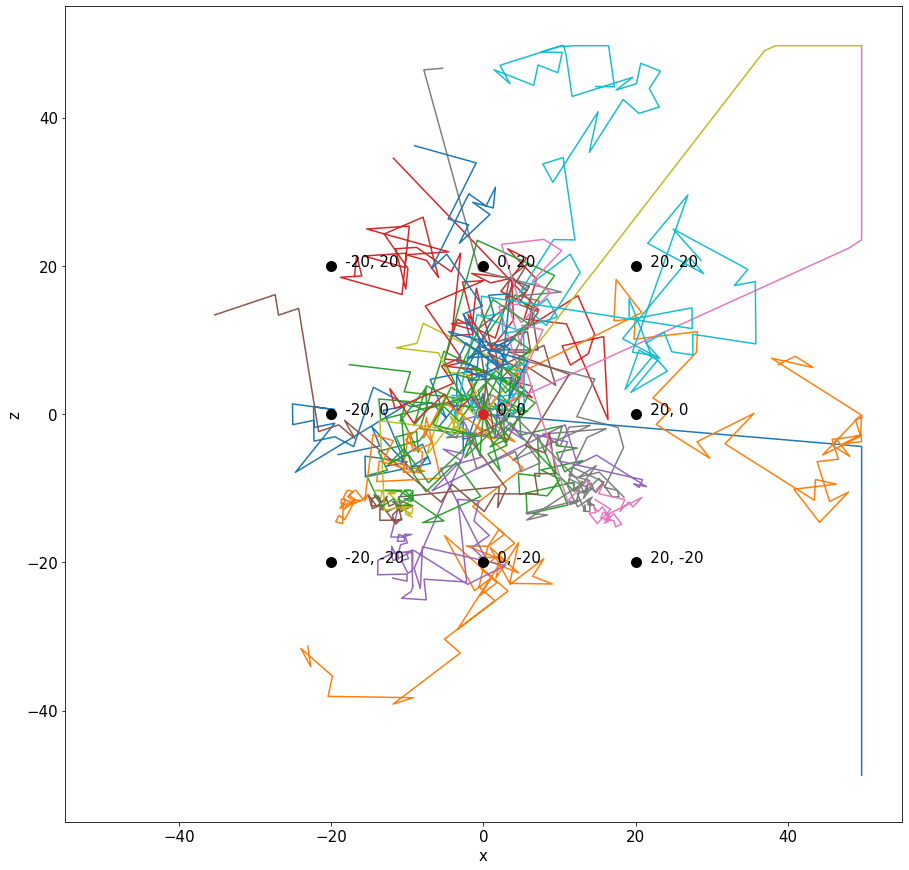

In [59]:
goal_states = [
    [0,20],
    [20,20],
    [20,0],
    [20,-20],
    [0,-20],
    [-20,-20],
    [-20,0],
    [-20,20],
]
experiment = 'train_non-obfuscated-test-1'
t19 = Trajectory2D(experiment, initial_state, goal_states, fix_lim=True)
t19.plot_all_together()

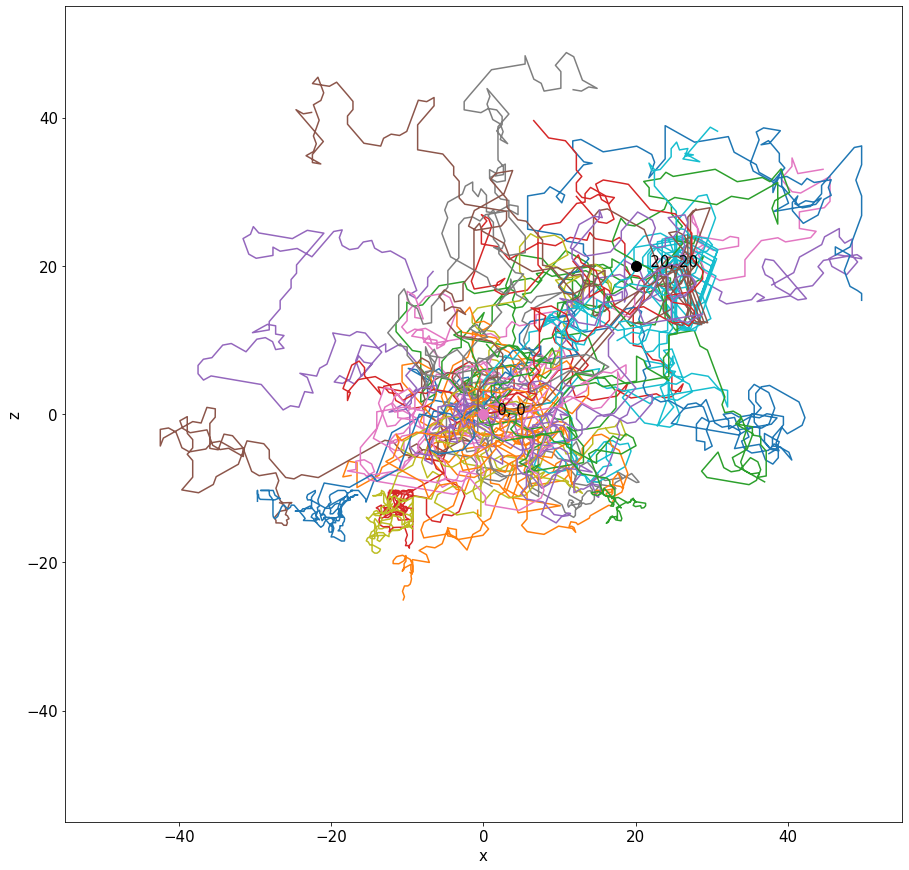

In [60]:
goal_states = [
    [20,20]
]
experiment = 'train_rl.1.0'
t20 = Trajectory2D(experiment, initial_state, goal_states, fix_lim=True,filter_traj=450)
t20.plot_all_together()

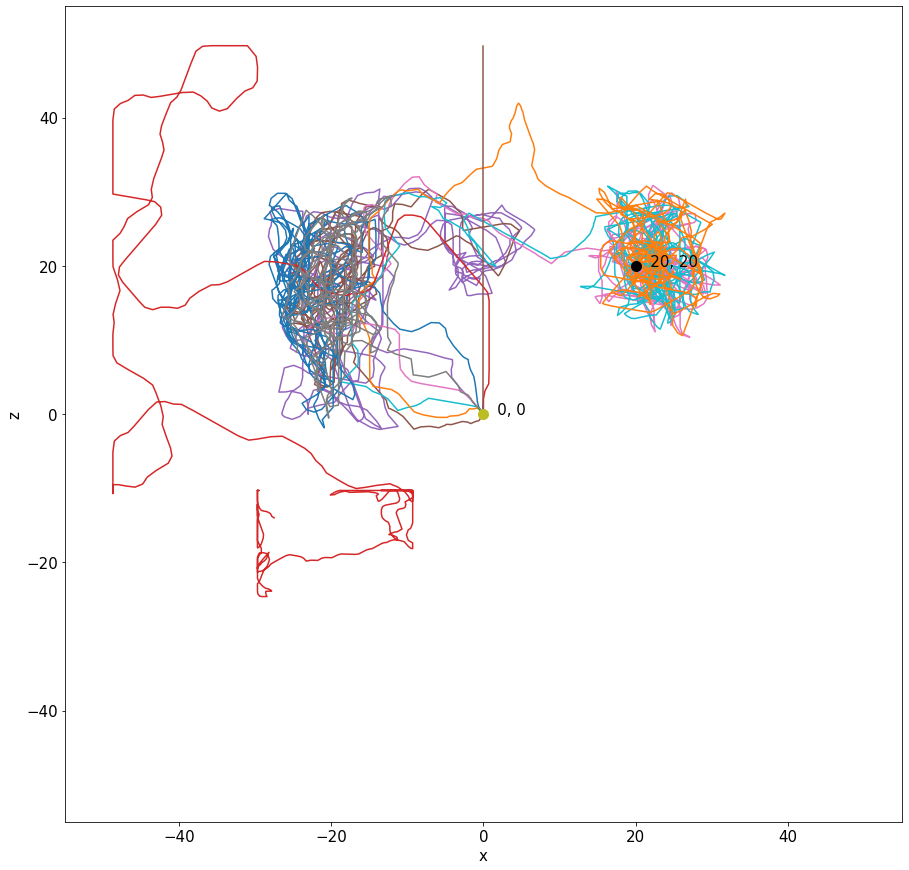

In [61]:
goal_states = [
    [20,20]
]
experiment = 'train_rl.1.1'
t21 = Trajectory2D(experiment, initial_state, goal_states, fix_lim=True)
t21.plot_all_together()

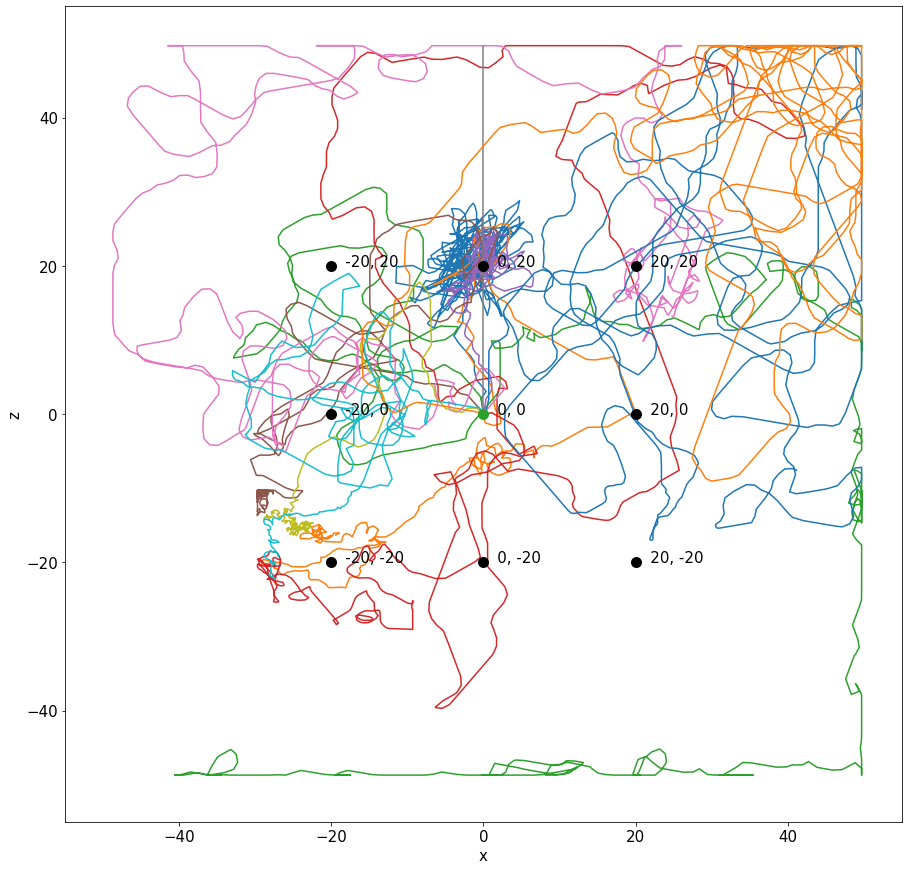

In [62]:
goal_states = [
    [0,20],
    [20,20],
    [20,0],
    [20,-20],
    [0,-20],
    [-20,-20],
    [-20,0],
    [-20,20],
]
experiment = 'train_rl.1.2'
t22 = Trajectory2D(experiment, initial_state, goal_states, fix_lim=True)
t22.plot_all_together()

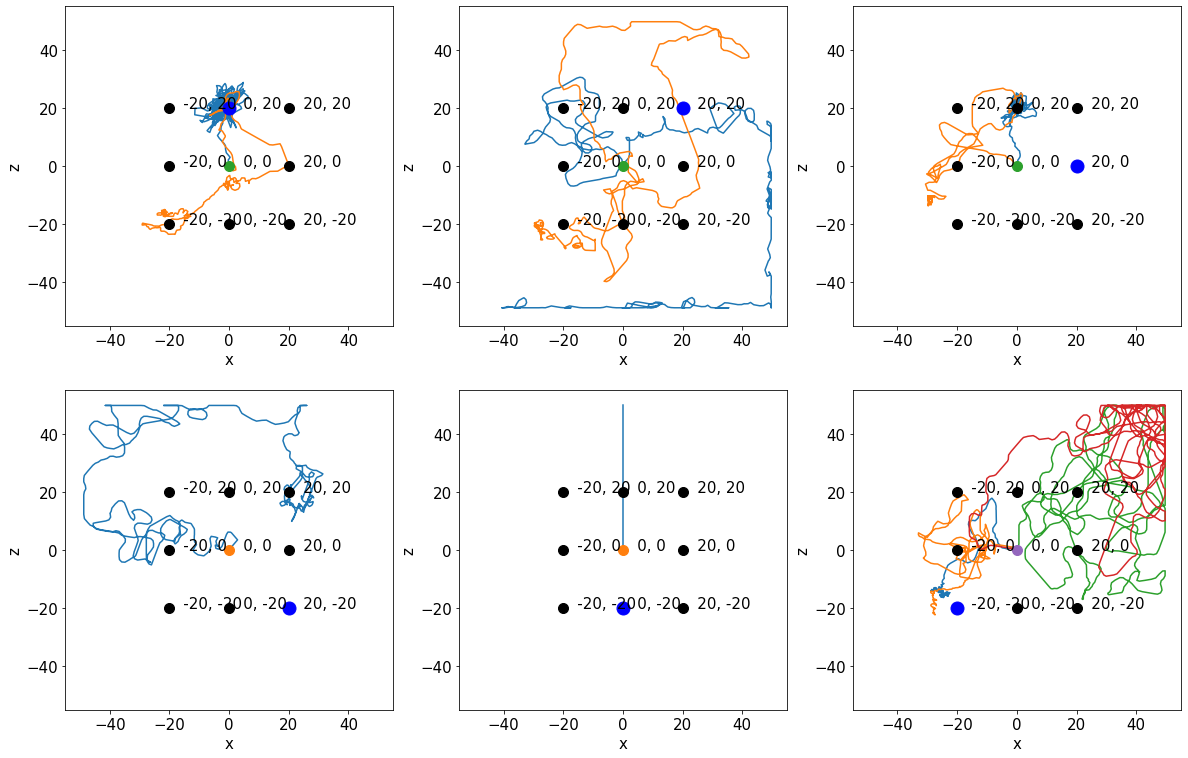

In [63]:
t22.plot_per_goal_state()

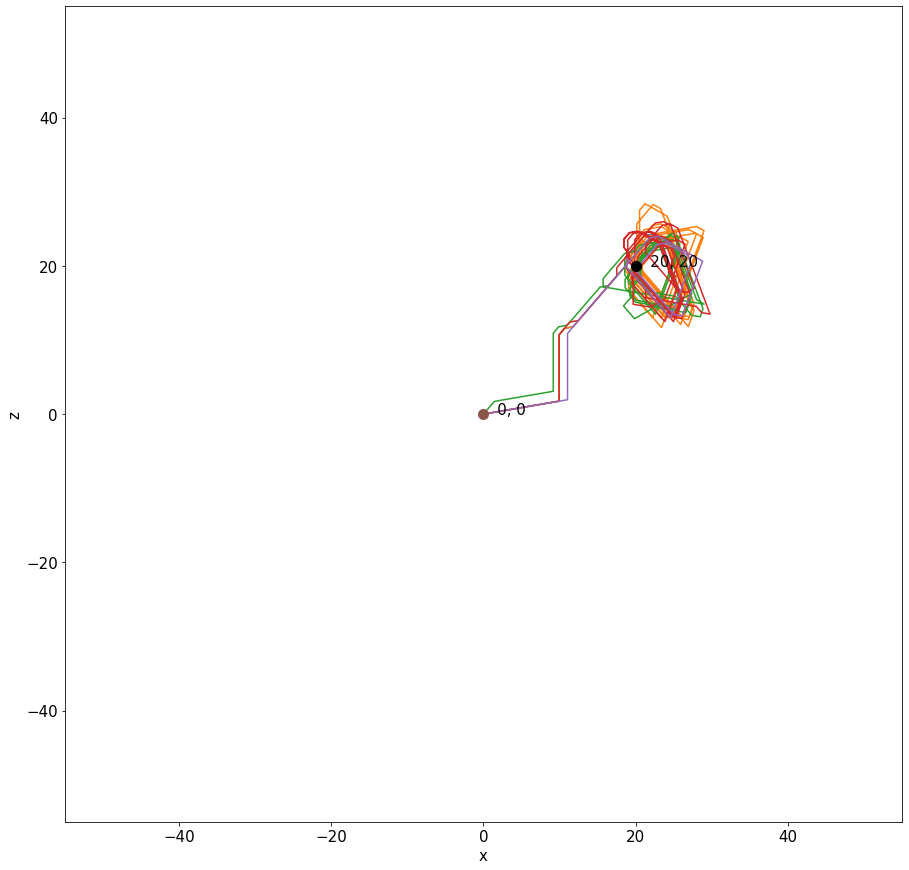

In [64]:
goal_states = [
    [20,20]
]
experiment = 'eval_rl.1.0'
t23 = Trajectory2D(experiment, initial_state, goal_states, fix_lim=True)
t23.plot_all_together()

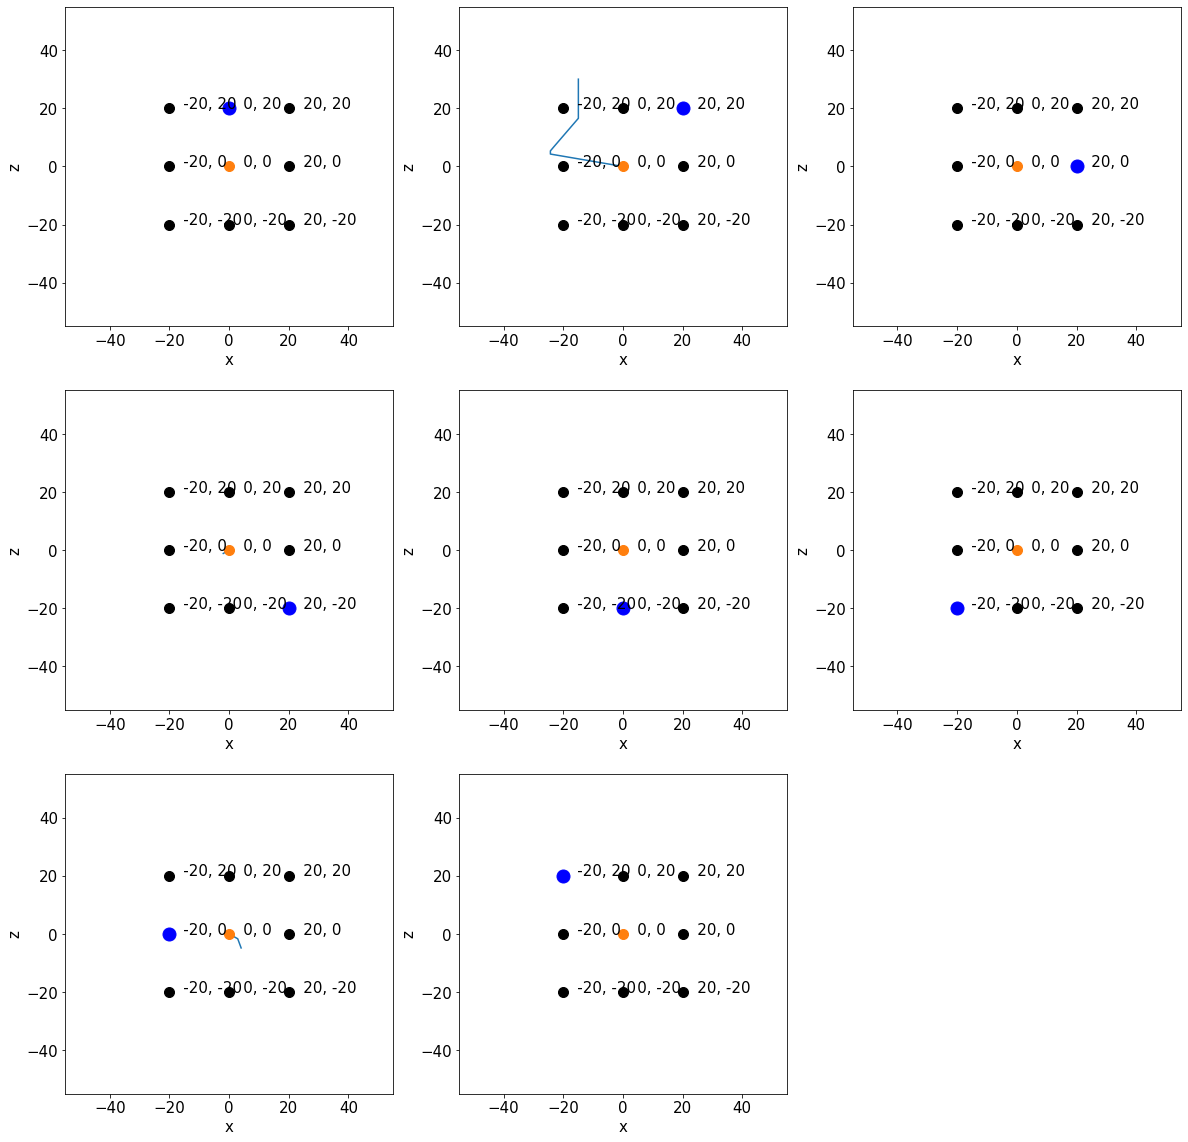

In [65]:
goal_states = [
    [0,20],
    [20,20],
    [20,0],
    [20,-20],
    [0,-20],
    [-20,-20],
    [-20,0],
    [-20,20],
]
experiment = 'eval_rl.1.2'
t24 = Trajectory2D(experiment, initial_state, goal_states, fix_lim=True)
t24.plot_per_goal_state()

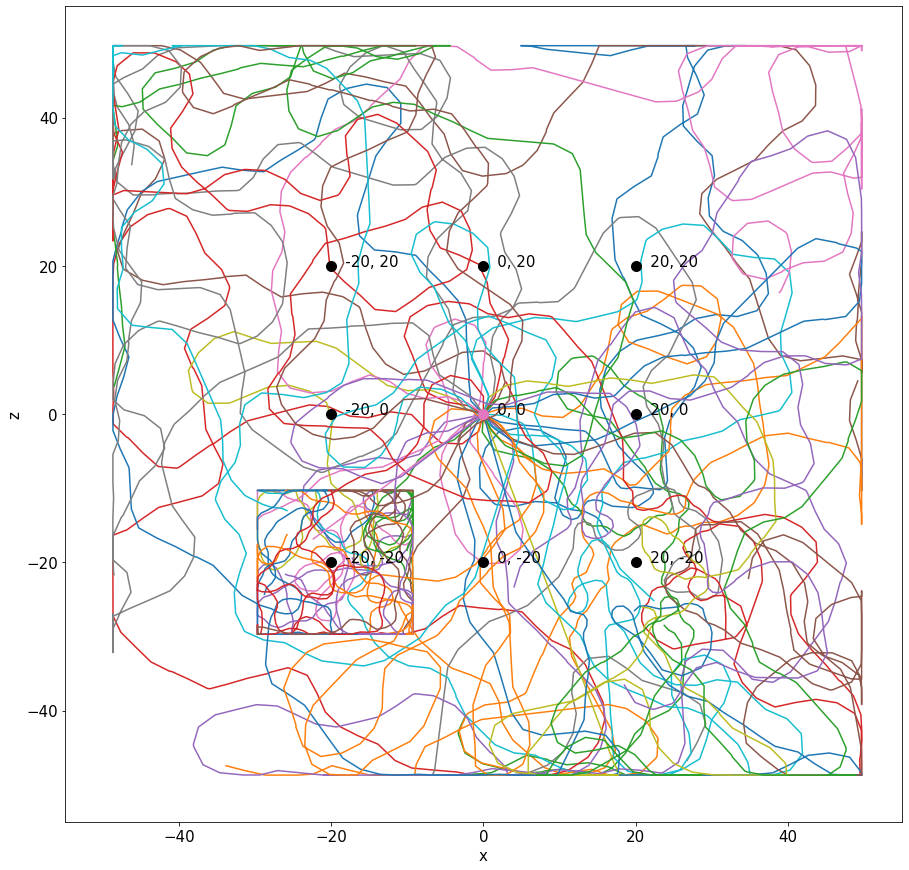

In [67]:
goal_states = [
    [0,20],
    [20,20],
    [20,0],
    [20,-20],
    [0,-20],
    [-20,-20],
    [-20,0],
    [-20,20],
]
experiment = 'train_test'
t24 = Trajectory2D(experiment, initial_state, goal_states, fix_lim=True)
t24.plot_all_together()